In [ ]:
# import everything we need
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import telfit
from astropy.io import fits
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import FixedTarget
from specutils import Spectrum1D



try:
    import seaborn as sns
    sns.set_context('notebook', font_scale=1.5)
    sns.set_style('whitegrid')
except ImportError:
    pass



os.chdir('/home/manjunath/exo_data/hd_reanalysis/sodium/')

files = os.listdir()
files = [file for file in files]
files = sorted(files, key=lambda x: (x))
print(files)

/root/anaconda3/lib/python3.11/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/root/anaconda3/lib/python3.11/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


['21Oct2023_008_ap20.fits', '21Oct2023_008_ap20_model_tc.csv', '21Oct2023_008_ap20_tc.csv', '21Oct2023_008_ap21.fits', '21Oct2023_008_model_tc.csv', '21Oct2023_008_tc.csv', '21Oct2023_008_tc.dat', '21Oct2023_009_ap20.fits', '21Oct2023_009_ap20_model_tc.csv', '21Oct2023_009_ap20_tc.csv', '21Oct2023_009_ap21.fits', '21Oct2023_009_model_tc.csv', '21Oct2023_009_tc.csv', '21Oct2023_009_tc.dat', '21Oct2023_010_ap20.fits', '21Oct2023_010_ap20_model_tc.csv', '21Oct2023_010_ap20_tc.csv', '21Oct2023_010_ap21.fits', '21Oct2023_010_model_tc.csv', '21Oct2023_010_tc.csv', '21Oct2023_010_tc.dat', '21Oct2023_011_ap20.fits', '21Oct2023_011_ap20_model_tc.csv', '21Oct2023_011_ap20_tc.csv', '21Oct2023_011_ap21.fits', '21Oct2023_011_model_tc.csv', '21Oct2023_011_tc.csv', '21Oct2023_011_tc.dat', '21Oct2023_012_ap20.fits', '21Oct2023_012_ap20_model_tc.csv', '21Oct2023_012_ap20_tc.csv', '21Oct2023_012_ap21.fits', '21Oct2023_012_model_tc.csv', '21Oct2023_012_tc.csv', '21Oct2023_012_tc.dat', '21Oct2023_013_ap20

In [2]:
def convert_to_julian_day(date_str):
    # Create a Time object from the input string
    t = Time(date_str, format='iso', scale='utc')
    
    # Return the Julian Day value
    return t.jd

# Example usage
date_str = "2025-02-14 04:59"
julian_day = convert_to_julian_day(date_str)
print(f"Julian Day: {julian_day}")

times = []
object_files = []
for i in files:
    if i.endswith('_ap20.fits'):
        df = fits.open(i)
        header = df[0].header
        date = header['DATE-OBS']
        time = header['UT']
        times.append(time)
        object_files.append(i)

Julian Day: 2460720.707638889


In [ ]:


# Location of IAO (Hanle), India
iao_location = EarthLocation(lat=32.7794*u.deg, lon=78.9647*u.deg, height=4500*u.m)

# Target coordinates (HD 209458)
target = SkyCoord.from_name("HD 209458")

# Observation date and times
date = "2023-10-21"
exposure = 20 #min

# New times adjusted for exposure
new_times = []
for t in times:
    dt = datetime.strptime(t, "%H:%M:%S.%f") + timedelta(minutes=exposure / 2)
    new_times.append(dt.strftime("%H:%M:%S.%f")[:-3])

zeniths = []
airmases = []
mjd = []
# Compare zenith angles and airmass
for t in new_times:
    datetime_utc = Time(f"{date} {t}")
    altaz = target.transform_to(AltAz(obstime=datetime_utc, location=iao_location))
    zen_angle = 90 - altaz.alt.degree
    zeniths.append(zen_angle)
    airmass = altaz.secz
    calculated_airmass = 1 / np.cos(np.radians(zen_angle))
    airmases.append(calculated_airmass)
    mjd.append(datetime_utc.mjd)
    print(f"Time: {t}")
    print(f"  Zenith Angle (Alt): {zen_angle:.2f}°")
    print(f"  Airmass (AltAz): {airmass:.3f}")
    print(f"  Airmass (Calc): {calculated_airmass:.3f}")
    print("-" * 40)

Time: 13:45:21.286
  Zenith Angle (Alt): 19.89°
  Airmass (AltAz): 1.063
  Airmass (Calc): 1.063
----------------------------------------
Time: 14:06:09.810
  Zenith Angle (Alt): 16.84°
  Airmass (AltAz): 1.045
  Airmass (Calc): 1.045
----------------------------------------
Time: 14:29:13.609
  Zenith Angle (Alt): 14.50°
  Airmass (AltAz): 1.033
  Airmass (Calc): 1.033
----------------------------------------
Time: 14:50:04.837
  Zenith Angle (Alt): 13.78°
  Airmass (AltAz): 1.030
  Airmass (Calc): 1.030
----------------------------------------
Time: 15:10:59.161
  Zenith Angle (Alt): 14.61°
  Airmass (AltAz): 1.033
  Airmass (Calc): 1.033
----------------------------------------
Time: 15:32:59.196
  Zenith Angle (Alt): 16.91°
  Airmass (AltAz): 1.045
  Airmass (Calc): 1.045
----------------------------------------
Time: 15:53:52.745
  Zenith Angle (Alt): 20.00°
  Airmass (AltAz): 1.064
  Airmass (Calc): 1.064
----------------------------------------
Time: 16:17:07.771
  Zenith Angle 

Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




a floating-point value was expected. [astropy.wcs.wcs]
        Use Spectrum instead. [astropy.io.registry.core]
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.22system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.25system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624360outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.09system 0:01.76elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.11system 0:01.78elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.33system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.17system 0:01.91elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.93658E+01	True		0 - 60
co2            	3.86963E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.22system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.68885E-03	True		0 - 60
co2            	3.04164E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.09system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+645600outputs (0major+1100minor)pagefaults 0swaps
/root/anaconda3/lib/python3.11/site-packages/TelluricFitter.py:1049: RuntimeWarning: divide by zero encountered in divide
  retval = (data.y / data.cont / model(data.x + dx) - 1.0) + penalty


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.45389E+01	True		0 - 60
co2            	3.21236E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.03system 0:01.71elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+644096outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.63371E+01	True		0 - 60
co2            	3.52984E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.02system 0:01.67elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644064outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.17364E+01	True		0 - 60
co2            	3.69548E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.11system 0:01.81elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 0.91system 0:01.59elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624360outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.49270E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.13system 0:01.83elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.76270E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.10system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.96system 0:01.61elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.31656E+01	True		0 - 60
co2            	3.75841E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.00system 0:01.65elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.36052E+01	True		0 - 60
co2            	3.75934E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.05system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37357E+01	True		0 - 60
co2            	3.75962E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.12system 0:01.80elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37436E+01	True		0 - 60
co2            	3.75963E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.00system 0:01.67elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37498E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.23system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37504E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 0.94system 0:01.61elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.07system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.49270E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.68user 1.19system 0:01.88elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.76270E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.11system 0:01.79elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.05system 0:01.76elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 0.94system 0:01.61elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.16system 0:01.93elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.09system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37505E+01	True		0 - 60
co2            	3.75965E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.94system 0:01.60elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1102minor)pagefaults 0swaps


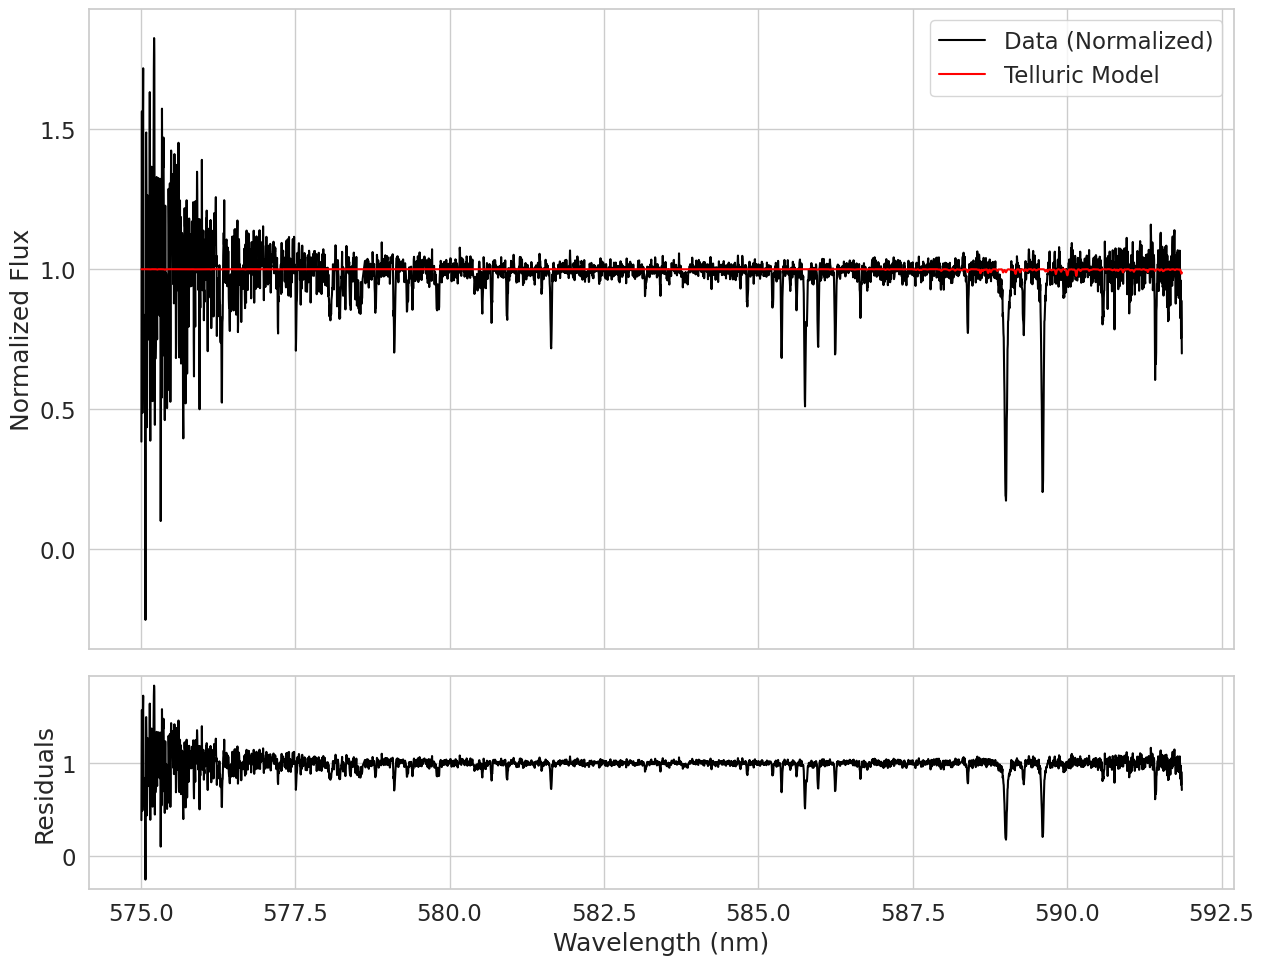

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.09system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.95system 0:01.60elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.00system 0:01.68elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.10system 0:01.77elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.20system 0:01.88elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 0.99system 0:01.65elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.47539E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.05system 0:01.70elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644096outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.29172E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 0.94system 0:01.60elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.38352E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.00system 0:01.63elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.29172E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.08system 0:01.73elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.29172E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 0.94system 0:01.59elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.01828E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.61user 1.12system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.21337E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 0.98system 0:01.65elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.28067E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 0.98system 0:01.62elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.21337E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 0.96system 0:01.61elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.21337E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.12system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.15105E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.01system 0:01.65elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.18419E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.16system 0:01.80elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.19979E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.93system 0:01.58elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20713E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.12system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.21057E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.01system 0:01.65elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.27700E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.02system 0:01.69elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.21057E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 0.98system 0:01.62elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624304outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.21057E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.15system 0:01.83elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624360outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20462E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.61user 1.09system 0:01.70elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20874E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.61user 1.14system 0:01.76elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20980E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.16system 0:01.81elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.27598E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.10system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20980E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.09system 0:01.72elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20980E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.17system 0:01.79elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20901E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.20system 0:01.87elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.14system 0:01.80elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.27587E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.08system 0:01.75elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.16system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 0.99system 0:01.62elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20957E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.68user 1.13system 0:01.81elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20970E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.04system 0:01.69elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 0.91system 0:01.59elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624304outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.03system 0:01.70elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.02system 0:01.67elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624304outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.20972E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.09system 0:01.72elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


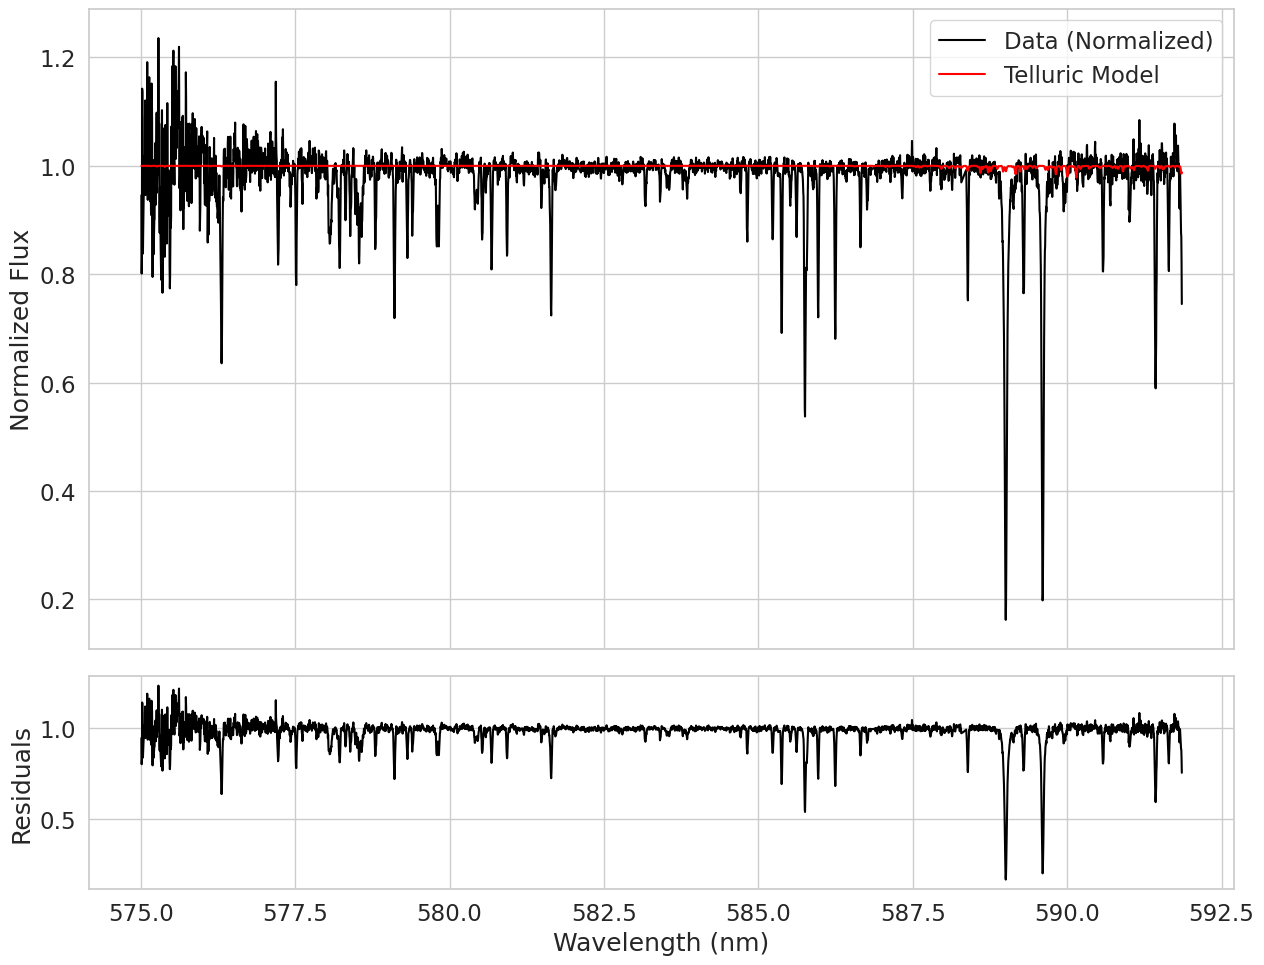

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.10system 0:01.75elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.11system 0:01.76elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.10system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 7168maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.07system 0:01.72elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.09system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.02system 0:01.69elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624304outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	8.13050E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.05system 0:01.75elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+645600outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.31986E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.28system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.41213E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.04system 0:01.75elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.11system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.27878E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.00system 0:01.64elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.14system 0:01.77elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.15system 0:01.82elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624384outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.77177E+01	True		0 - 60
co2            	3.92424E+02	True		300 - 450
o2             	2.41026E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.01system 0:01.68elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.07533E+01	True		0 - 60
co2            	3.81418E+02	True		300 - 450
o2             	2.15386E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.05system 0:01.70elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.01124E+01	True		0 - 60
co2            	3.80412E+02	True		300 - 450
o2             	2.12984E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.17system 0:01.81elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98768E+01	True		0 - 60
co2            	3.80041E+02	True		300 - 450
o2             	2.12099E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 0.97system 0:01.62elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624352outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98532E+01	True		0 - 60
co2            	3.80004E+02	True		300 - 450
o2             	2.12010E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.94system 0:01.60elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98508E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12001E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.09system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.10system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.17system 0:01.85elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.03system 0:01.71elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.27878E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.10system 0:01.75elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.08system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.04system 0:01.69elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624344outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.03system 0:01.68elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.98505E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.08system 0:01.71elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


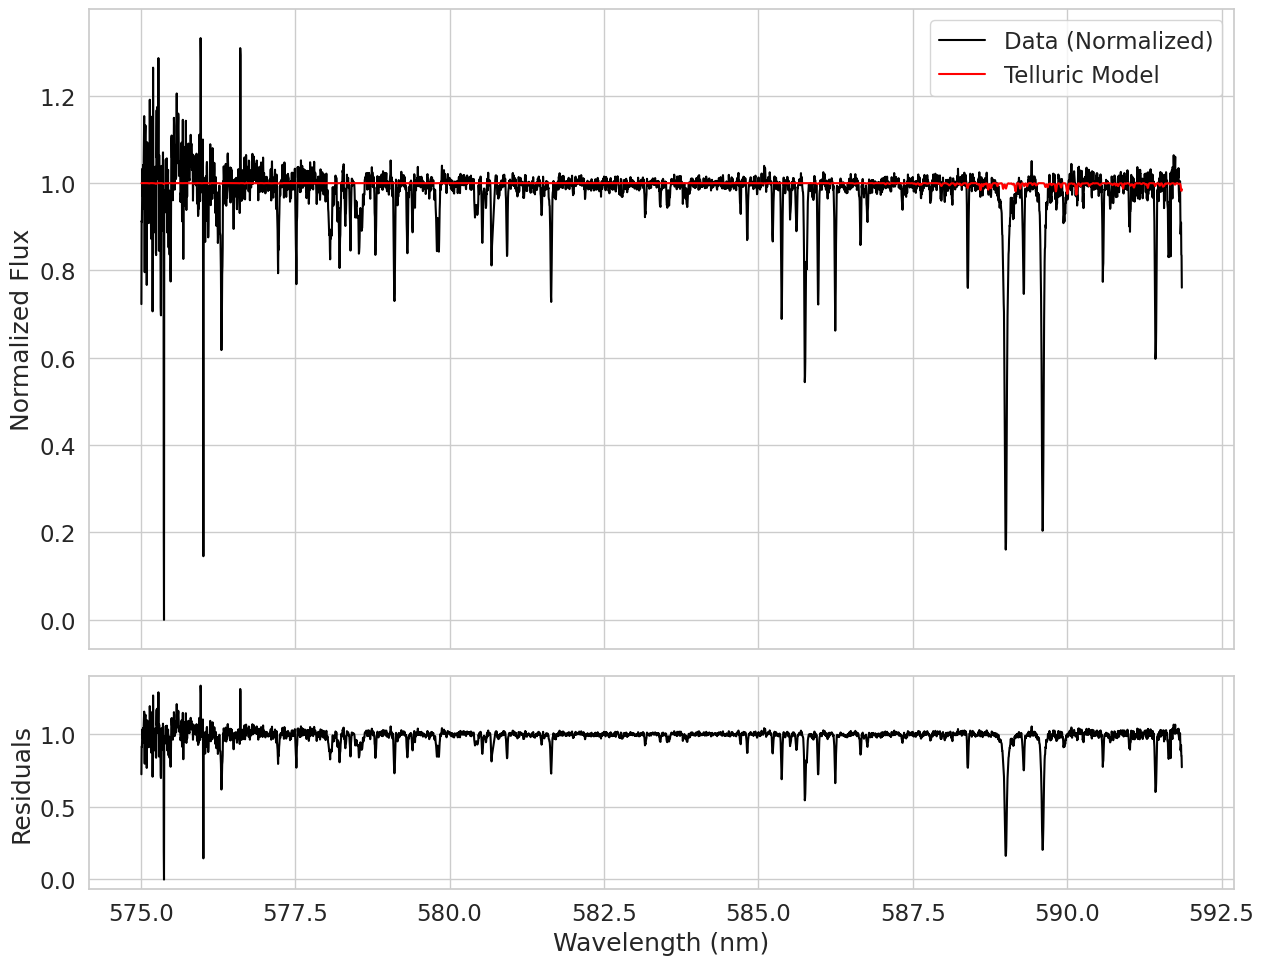

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.19system 0:01.82elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.00system 0:01.68elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.95system 0:01.61elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 0.95system 0:01.61elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.01system 0:01.66elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624304outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 0.93system 0:01.63elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.62149E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.11system 0:01.79elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.62175E-03	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 0.98system 0:01.67elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+645584outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.62149E+01	True		0 - 60
co2            	3.44500E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.68user 1.20system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.62149E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.99941E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.68user 0.99system 0:01.67elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.55364E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.04system 0:01.70elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.55364E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.11system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.59705E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.09system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644128outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96565E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.14system 0:01.84elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663352outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.03661E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.19system 0:01.84elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644064outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96565E+01	True		0 - 60
co2            	3.44500E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.07system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96565E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.99941E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.00system 0:01.70elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663416outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.06692E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 0.94system 0:01.64elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663352outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.79254E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.09system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94047E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.16system 0:01.83elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96339E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.16system 0:01.86elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96543E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.14system 0:01.84elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96563E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 0.97system 0:01.67elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96565E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.02system 0:01.73elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96565E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 0.99system 0:01.69elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96565E+01	True		0 - 60
co2            	4.02590E+02	True		300 - 450
o2             	2.21806E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.11system 0:01.78elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


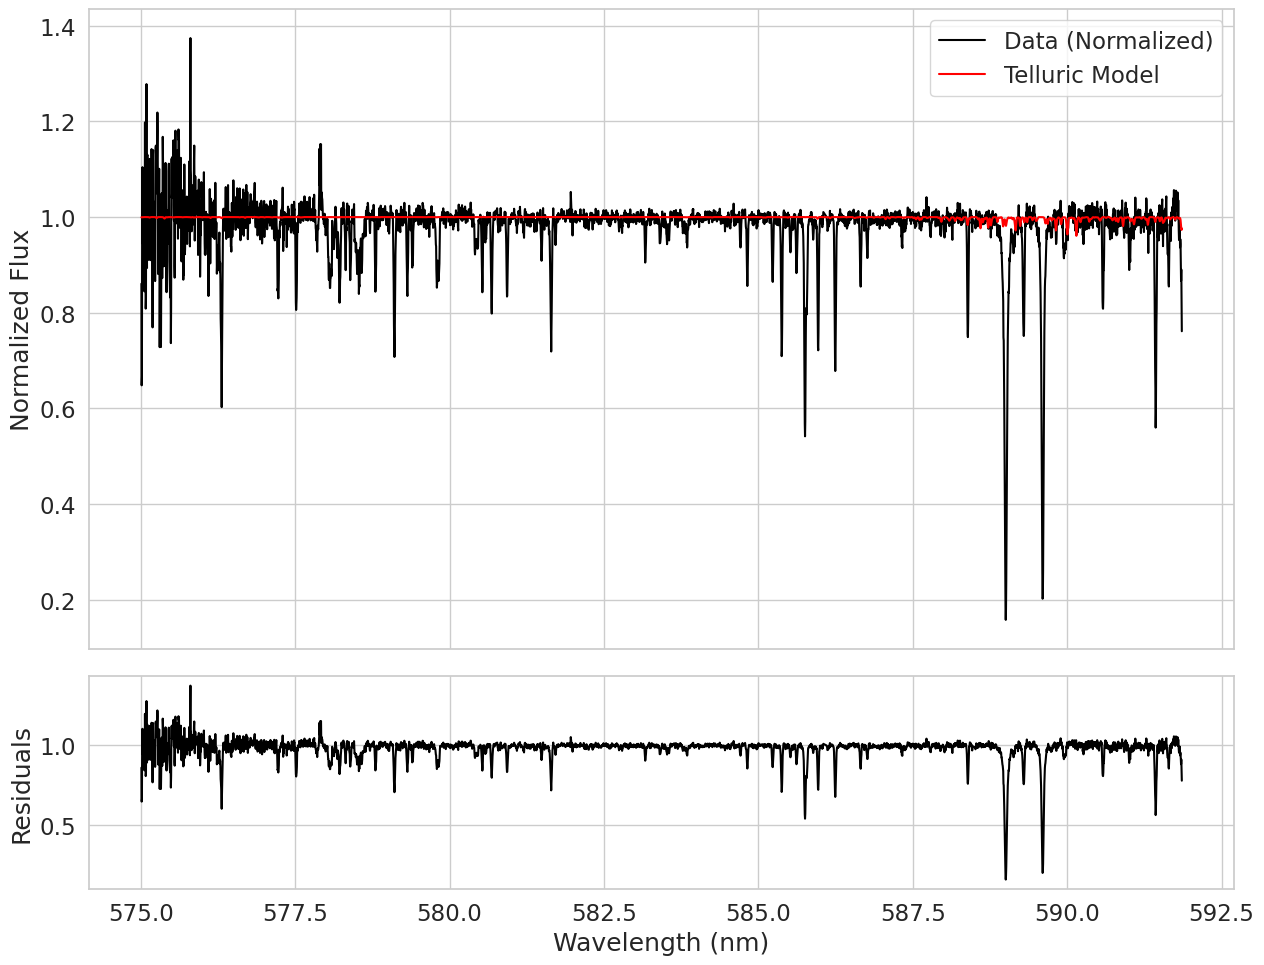

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 0.95system 0:01.63elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.09system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.13system 0:01.76elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.04system 0:01.72elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.20system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.19system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.59377E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.19system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663464outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.28019E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.17system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644080outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.59377E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.16system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.59377E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.69103E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.20system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663376outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.20794E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.19system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99887E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.28system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.18548E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.17system 0:01.87elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624344outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99887E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.18system 0:01.93elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99887E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.69103E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.22system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.73064E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.20system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663448outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.92917E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.22system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99094E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.22system 0:01.95elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.40007E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.32system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99094E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.23system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99094E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.69103E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.17system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.95265E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.30system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98014E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.23system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98923E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.18system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99078E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.22system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99093E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.24system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663392outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99094E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.20system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99094E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.23system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99094E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.01570E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.26system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1103minor)pagefaults 0swaps


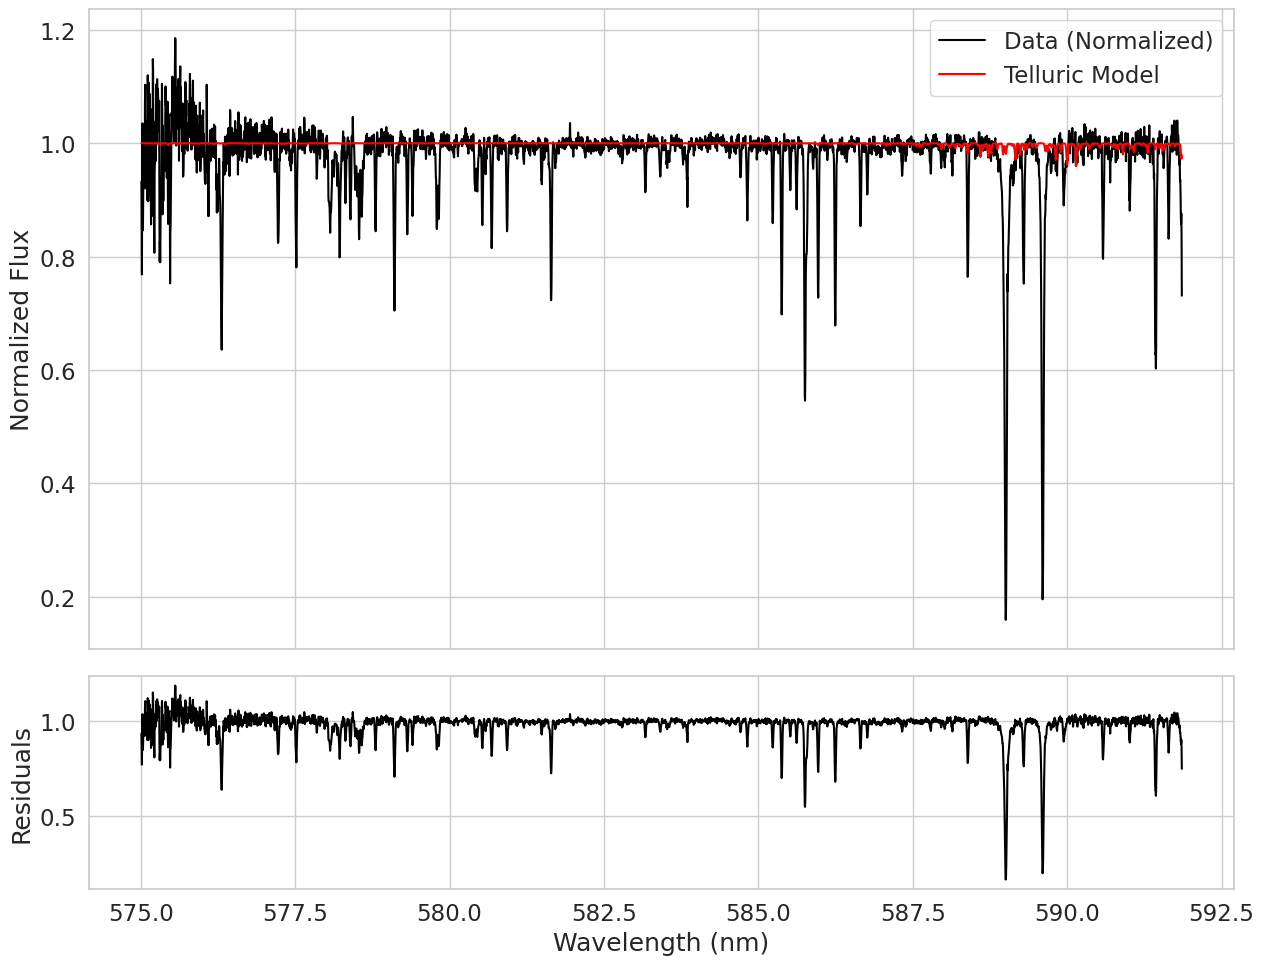

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.17system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.20system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624408outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.22system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.25system 0:01.95elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.25system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624400outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.26system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	6.30975E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.23system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+645600outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.12182E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.15system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.37327E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.24system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46371E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.16system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.60855E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.15system 0:01.87elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624352outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46371E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.24system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624400outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46371E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.19system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.41044E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.14system 0:01.88elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.45839E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.19system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.22system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624360outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.60780E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.16system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.18system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.21system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46198E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.11993E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.22system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624408outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46299E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.11999E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.19system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46311E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.18system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.17system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.60780E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.19system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.24system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624400outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.20system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.23system 0:01.94elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.68user 1.26system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.28system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624424outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.46313E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.22system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


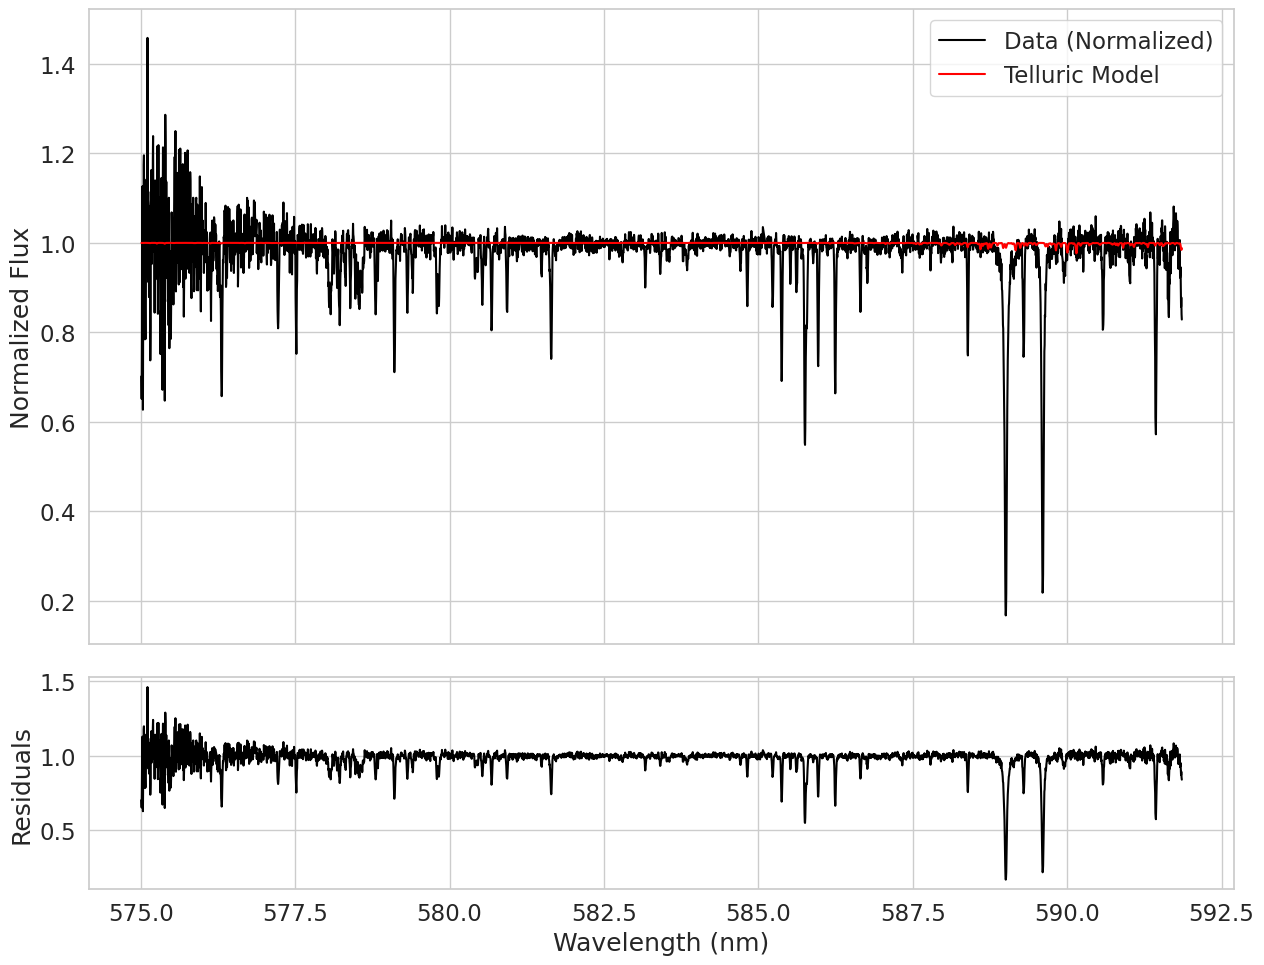

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.19system 0:01.93elapsed 100%CPU (0avgtext+0avgdata 7296maxresident)k
0inputs+624320outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.20system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.21system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.23system 0:01.94elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.21system 0:01.93elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.21system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.30060E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.00147E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.25system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.69499E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.24700E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.18system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+644080outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99990E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.99667E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.17system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663440outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.01765E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.64558E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.27system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.11780E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.20system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.44498E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.23system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.11780E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.18system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.11780E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.43562E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.19system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.14565E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46252E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.19system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.86358E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.22system 0:02.00elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46252E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.29system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663464outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46252E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.43562E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.28system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.04808E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.23system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.31757E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.23system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624328outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.41241E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.22system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624392outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.44722E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.16system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.45962E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.22system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46208E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.24system 0:02.01elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663432outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46247E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.22system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46251E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.26system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46252E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.23system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46252E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663424outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.46252E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.33579E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.28system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


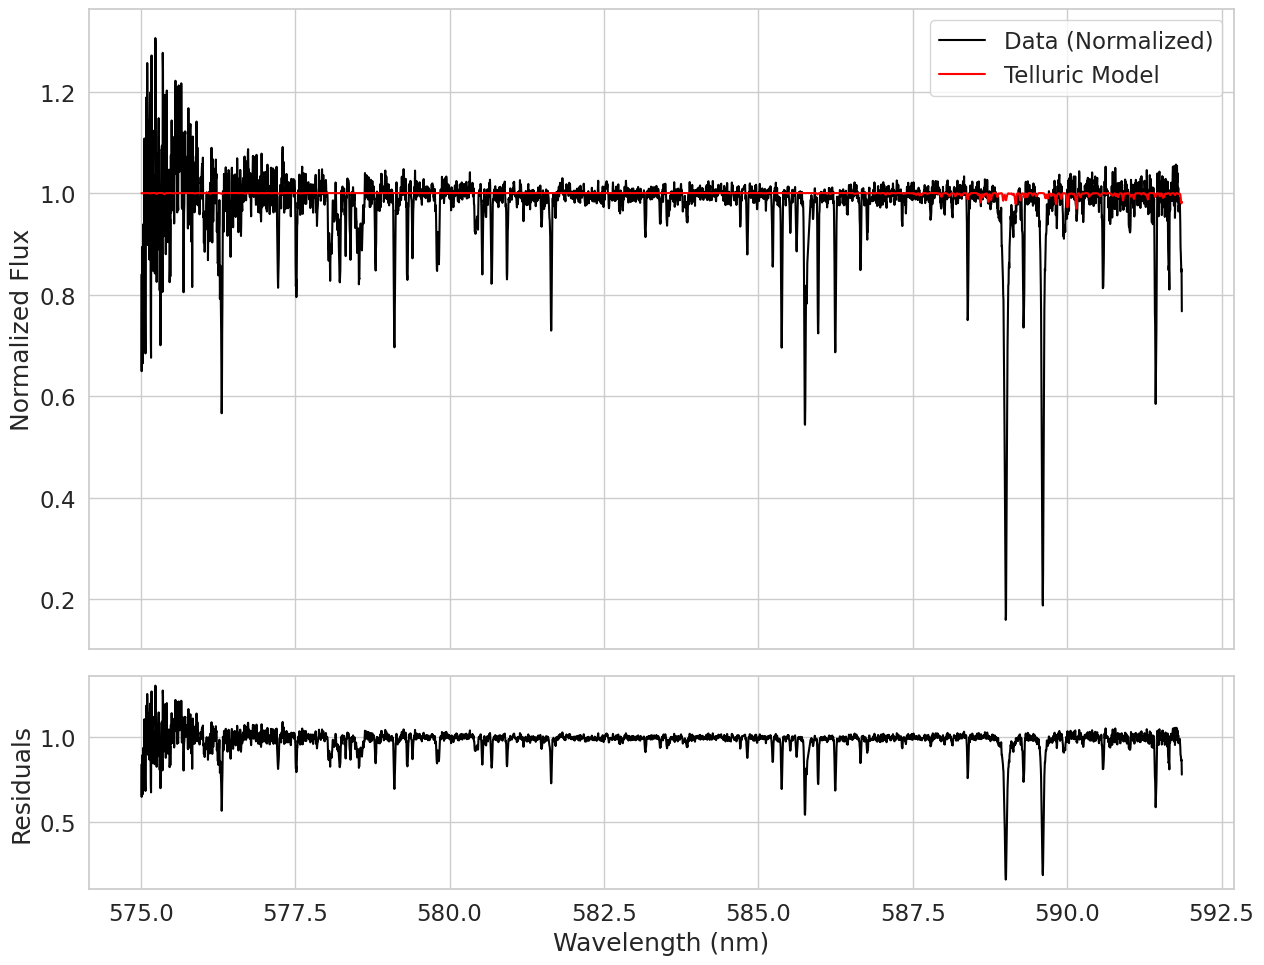

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.19system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624344outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.14system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624352outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.24system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.17system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.25system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.24system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.31656E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.18system 0:01.89elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624352outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.10708E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.21system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+644064outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.31656E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.15system 0:01.91elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.31656E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.20system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16371E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.23system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.70341E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.83user 1.25system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16371E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.26system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16371E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.31system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7424maxresident)k
0inputs+663392outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.63856E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.25system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+644080outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.95925E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.22system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.14407E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.23system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16176E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.25system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663448outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16352E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.23system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663376outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.70357E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.28system 0:02.04elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16352E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.30system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16352E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.06elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16312E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.28system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16348E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.19system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663392outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.70361E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.23system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663376outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16348E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.26system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16348E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.24system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16340E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.25system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16347E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.17system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16348E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.22system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663440outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.16348E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.27system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


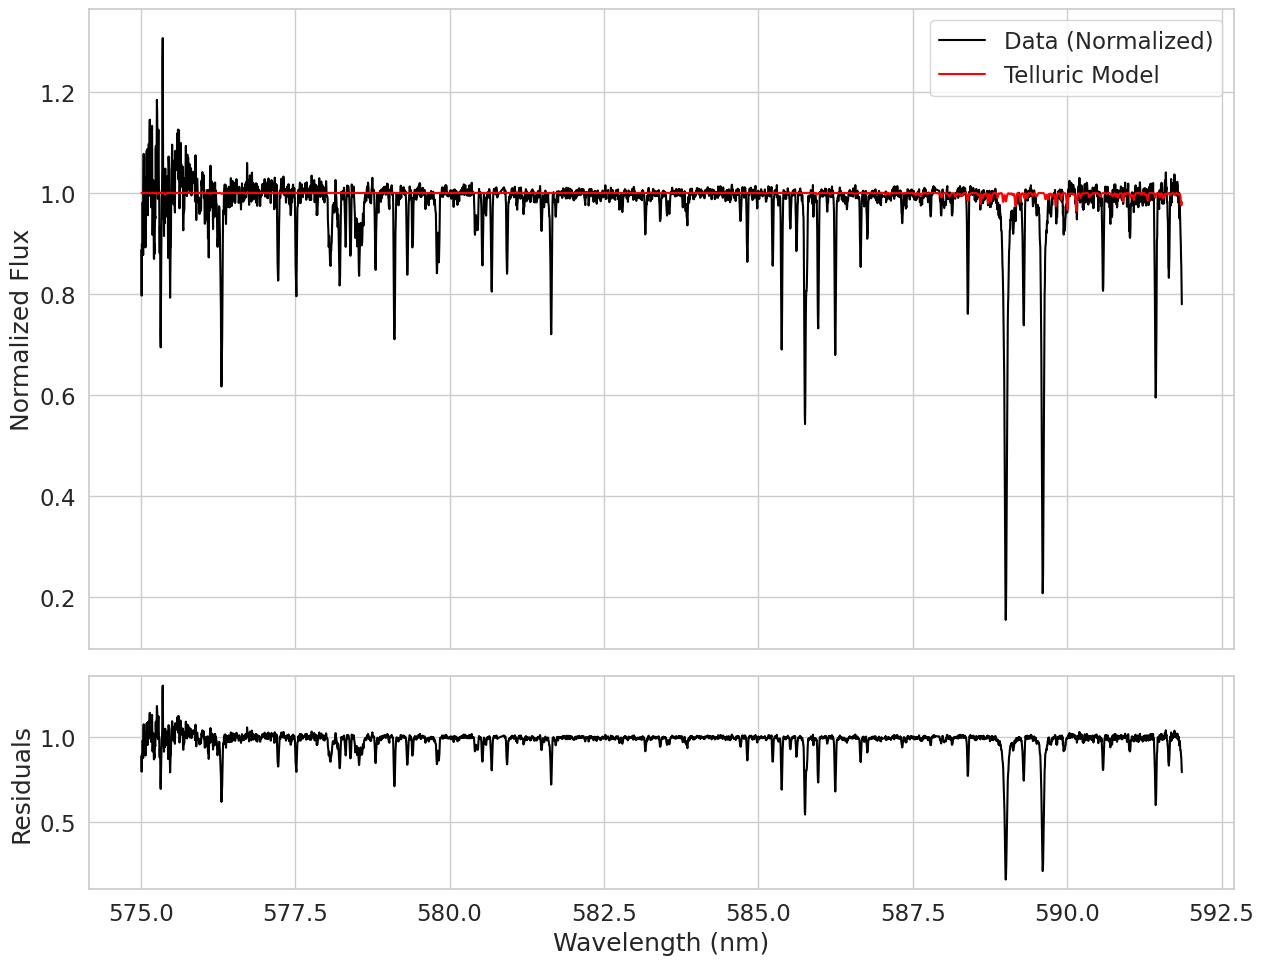

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.26system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.21system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7424maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.17system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624392outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.17system 0:01.92elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.20system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.26system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.56975E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.20system 0:01.92elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+645600outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.57472E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.22system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+645600outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.42029E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.26system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.71901E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.21system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.42029E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.29system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.42029E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.24system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.17system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663376outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.79670E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.35system 0:02.15elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.34system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.30system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.09538E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.23system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663392outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.95021E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.29system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97694E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.26system 0:02.04elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98524E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.25system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663440outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98607E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.24system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98615E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.26system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.23system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.34system 0:02.08elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.26system 0:02.00elapsed 100%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663432outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98616E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.22system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


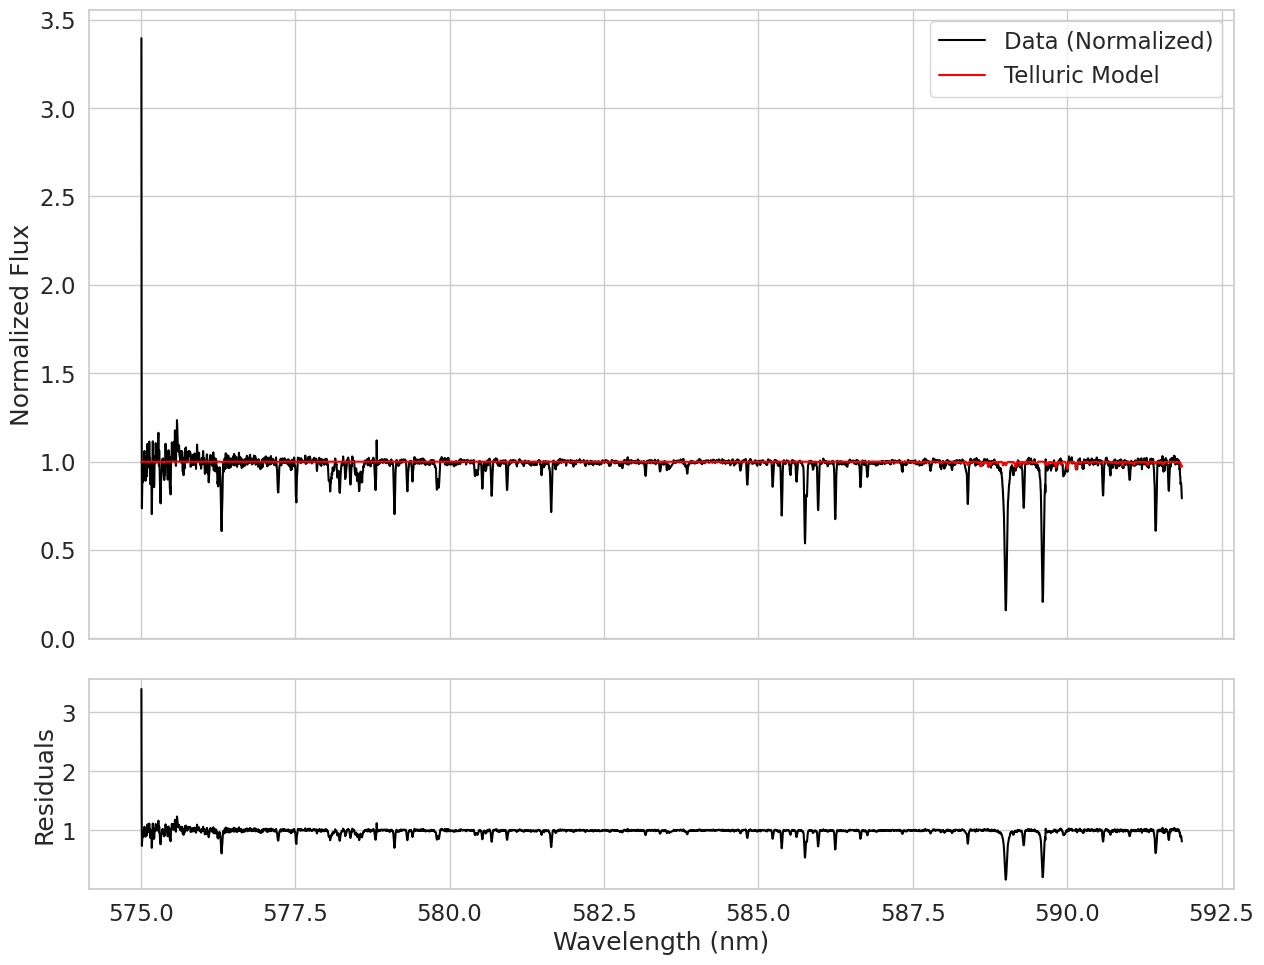

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.27system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.20system 0:01.91elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.27system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.21system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.22system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624328outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.22system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.70768E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.45392E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.24system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+645616outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.70768E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.30system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.70768E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.25system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.03443E-01	True		0 - 60
co2            	3.63985E+02	True		300 - 450
o2             	1.73736E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.23system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+645616outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94708E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.14821E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.39system 0:02.13elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+644064outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94708E+01	True		0 - 60
co2            	3.72347E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94708E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.93626E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.28system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.89509E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.23system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.59902E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.29system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663440outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.88121E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.31system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.92355E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94353E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.27system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663416outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94574E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.22system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663432outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94695E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.29system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.14895E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.37system 0:02.17elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
160inputs+644080outputs (1major+1097minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94695E+01	True		0 - 60
co2            	3.72347E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94695E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.93626E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.22system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94668E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.30system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94692E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663384outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.14910E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.26system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644088outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94692E+01	True		0 - 60
co2            	3.72347E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94692E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.93626E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.27system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94686E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90684E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.26system 0:02.01elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94691E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.25system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94692E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.23system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663400outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94692E+01	True		0 - 60
co2            	3.71121E+02	True		300 - 450
o2             	1.90685E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.24system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


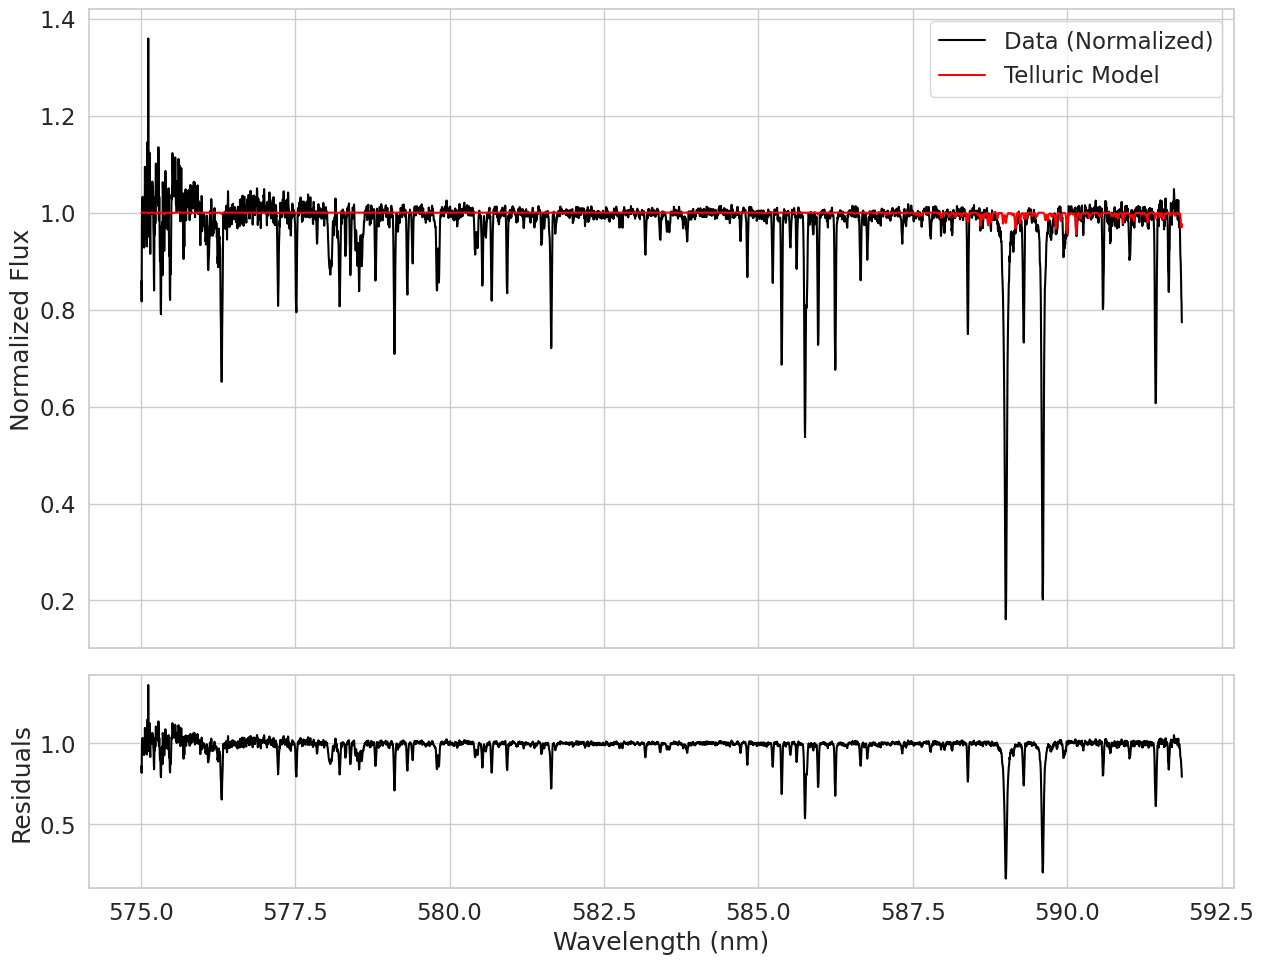

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.25system 0:01.96elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.26system 0:02.02elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.28system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.20system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.17system 0:01.93elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.23system 0:01.96elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.85266E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.24system 0:01.99elapsed 100%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.64879E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.25system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+644064outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.85266E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.29system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.85266E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.29system 0:02.04elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.74737E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+645624outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.34621E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.27system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.77604E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.26system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.34621E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.30system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663400outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.34621E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.24system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663392outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97978E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.38890E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.28system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97978E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.22system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663400outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97978E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.30system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.34621E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.26system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97424E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.29system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99992E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.27system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.62321E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.24system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663440outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99992E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.26system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99992E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.25system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.31system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.80126E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.33system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.29system 0:02.05elapsed 100%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.85642E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.34system 0:02.13elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97407E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.31system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98425E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.26system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98513E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.24system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98521E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.22system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663408outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.29system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.19system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.31system 0:02.06elapsed 100%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98522E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.22system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663392outputs (0major+1100minor)pagefaults 0swaps


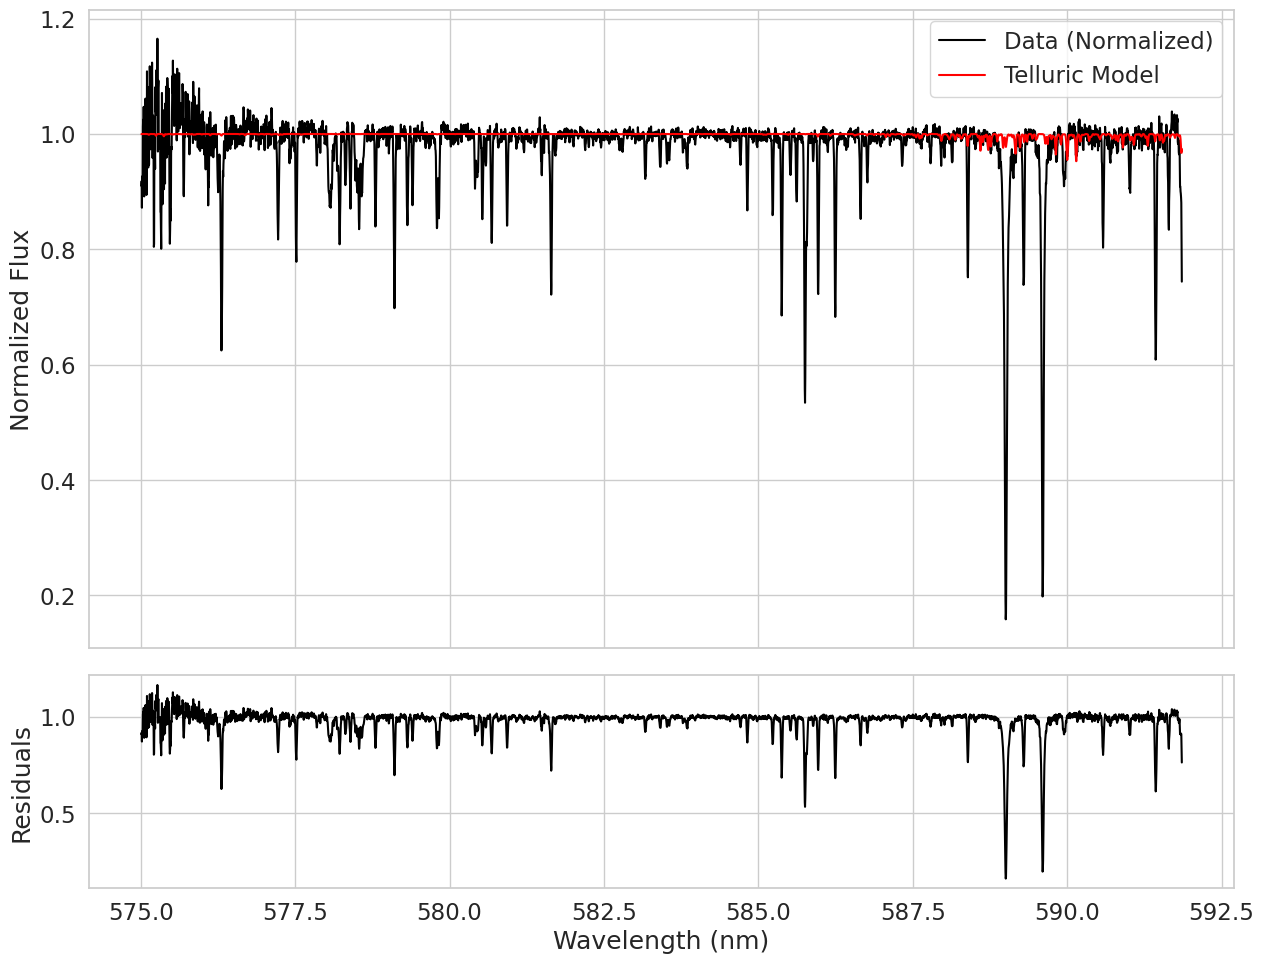

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.22system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.19system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.18system 0:01.95elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.24system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.17system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624328outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.28system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99300E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.26system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.49835E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.20system 0:02.01elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99300E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.22system 0:02.01elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99300E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663464outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.78859E+00	True		0 - 60
co2            	3.86708E+02	True		300 - 450
o2             	2.27887E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+645664outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.70178E+01	True		0 - 60
co2            	3.81750E+02	True		300 - 450
o2             	2.16177E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.31system 0:02.11elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663392outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99216E+01	True		0 - 60
co2            	3.80565E+02	True		300 - 450
o2             	2.13352E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.24system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663376outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.76135E+01	True		0 - 60
co2            	3.80565E+02	True		300 - 450
o2             	2.13352E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.21system 0:01.99elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99216E+01	True		0 - 60
co2            	3.82321E+02	True		300 - 450
o2             	2.13352E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.24system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99216E+01	True		0 - 60
co2            	3.80565E+02	True		300 - 450
o2             	2.17536E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.24system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663400outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98442E+01	True		0 - 60
co2            	3.79947E+02	True		300 - 450
o2             	2.11873E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.26system 0:02.10elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99079E+01	True		0 - 60
co2            	3.80436E+02	True		300 - 450
o2             	2.13044E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.33system 0:02.11elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663432outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99161E+01	True		0 - 60
co2            	3.80512E+02	True		300 - 450
o2             	2.13225E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.26system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663456outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99211E+01	True		0 - 60
co2            	3.80560E+02	True		300 - 450
o2             	2.13339E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.24system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663400outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99214E+01	True		0 - 60
co2            	3.80563E+02	True		300 - 450
o2             	2.13346E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.24system 0:02.00elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.76151E+01	True		0 - 60
co2            	3.80563E+02	True		300 - 450
o2             	2.13346E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.25system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99214E+01	True		0 - 60
co2            	3.82318E+02	True		300 - 450
o2             	2.13346E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.29system 0:02.06elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99214E+01	True		0 - 60
co2            	3.80563E+02	True		300 - 450
o2             	2.17528E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.25system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99203E+01	True		0 - 60
co2            	3.80563E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663432outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.76231E+01	True		0 - 60
co2            	3.80563E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.28system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663456outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99203E+01	True		0 - 60
co2            	3.82318E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.31system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663416outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99203E+01	True		0 - 60
co2            	3.80563E+02	True		300 - 450
o2             	2.17524E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.30system 0:02.10elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663392outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.76363E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.29system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.82307E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1105minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.17524E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.24system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99172E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.26system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663472outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99183E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.32system 0:02.10elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.27system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663392outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.30system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.23system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99184E+01	True		0 - 60
co2            	3.80555E+02	True		300 - 450
o2             	2.13343E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.20system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


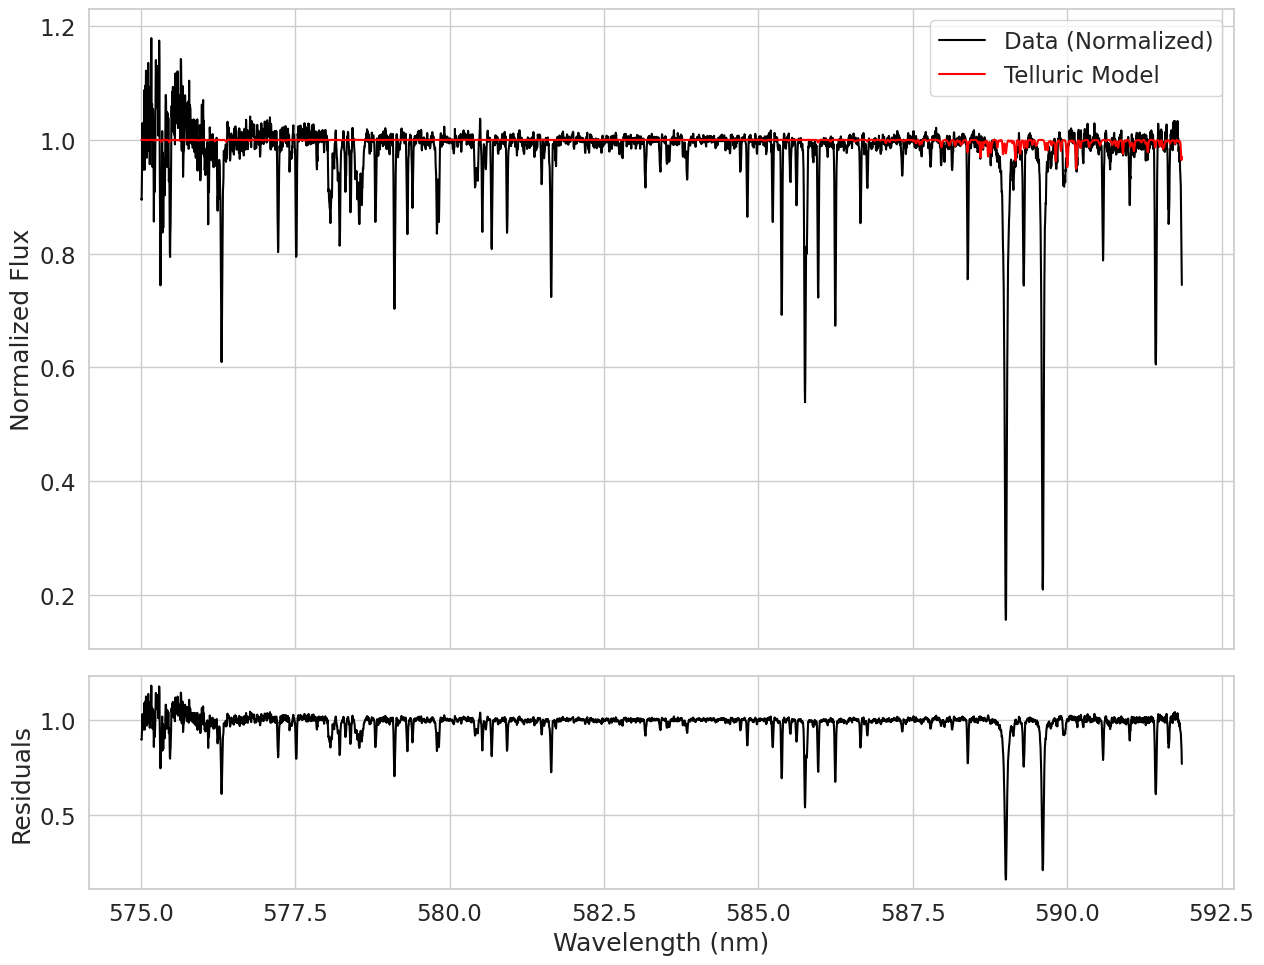

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.23system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624328outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.22system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624392outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.32system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624344outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.18system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.22system 0:01.97elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.23system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624400outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.66151E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.28system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.34274E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.25system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+644088outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.66151E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.66151E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.33system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	6.09815E+00	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.29system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+645600outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.21516E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.29system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.66452E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.29system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7424maxresident)k
0inputs+663368outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.21516E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663432outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.21516E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.27system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663440outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.90611E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.19system 0:01.94elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624328outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.65362E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.28system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.99733E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.26system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.12590E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.18438E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.25system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663440outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20565E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.29system 0:02.11elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663456outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.65596E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.25system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20565E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.27system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20565E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.31system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.18567E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.30system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.19813E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.30system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663440outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20472E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.31system 0:02.10elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663448outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20555E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.20system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.65588E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.23system 0:02.00elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20555E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.22system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20555E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20537E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.11999E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.31system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20553E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.28system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663400outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20555E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.23system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663384outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20555E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.23system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.20555E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.23system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


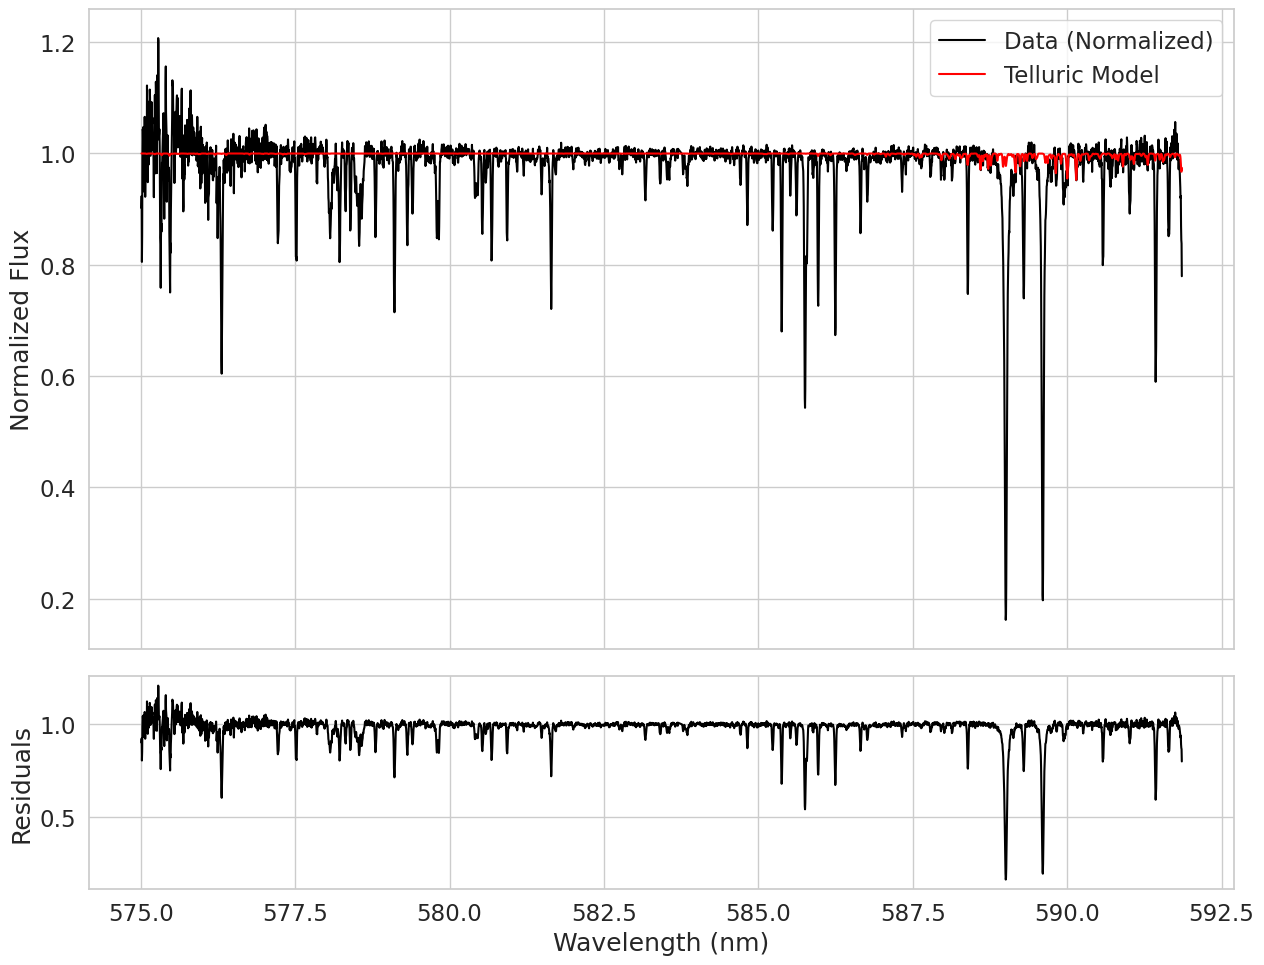

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.21system 0:01.98elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.27system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.71user 1.29system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
192inputs+624416outputs (1major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.27system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624336outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.23system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.27system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.37804E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.38986E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+644128outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.72486E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.04139E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.27system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.13175E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.04139E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.27system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+644064outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.72486E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	1.04139E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.27system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.72486E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.23140E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.26system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99817E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.04139E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.70029E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.04139E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.28system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663448outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99817E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	1.04139E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.25system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99817E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	1.23140E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.21system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	4.12141E+01	True		0 - 60
co2            	3.57220E+02	True		300 - 450
o2             	1.01376E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.22system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
16inputs+624320outputs (1major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96551E+01	True		0 - 60
co2            	3.73570E+02	True		300 - 450
o2             	1.03217E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.31system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663432outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98985E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.27system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663416outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.77652E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98985E+01	True		0 - 60
co2            	3.77809E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.31system 0:02.11elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663384outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98985E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.22474E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.30system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.87309E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.34system 0:02.16elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663400outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97985E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.29system 0:02.07elapsed 100%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98900E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.26system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98959E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.27system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.26system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663384outputs (0major+1104minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.77669E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.30system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663416outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77809E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.22system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.22474E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.33system 0:02.13elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663384outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98977E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.24system 0:02.06elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663440outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.28system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.25system 0:02.03elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.23system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98982E+01	True		0 - 60
co2            	3.77135E+02	True		300 - 450
o2             	1.03714E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.19system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663400outputs (0major+1100minor)pagefaults 0swaps


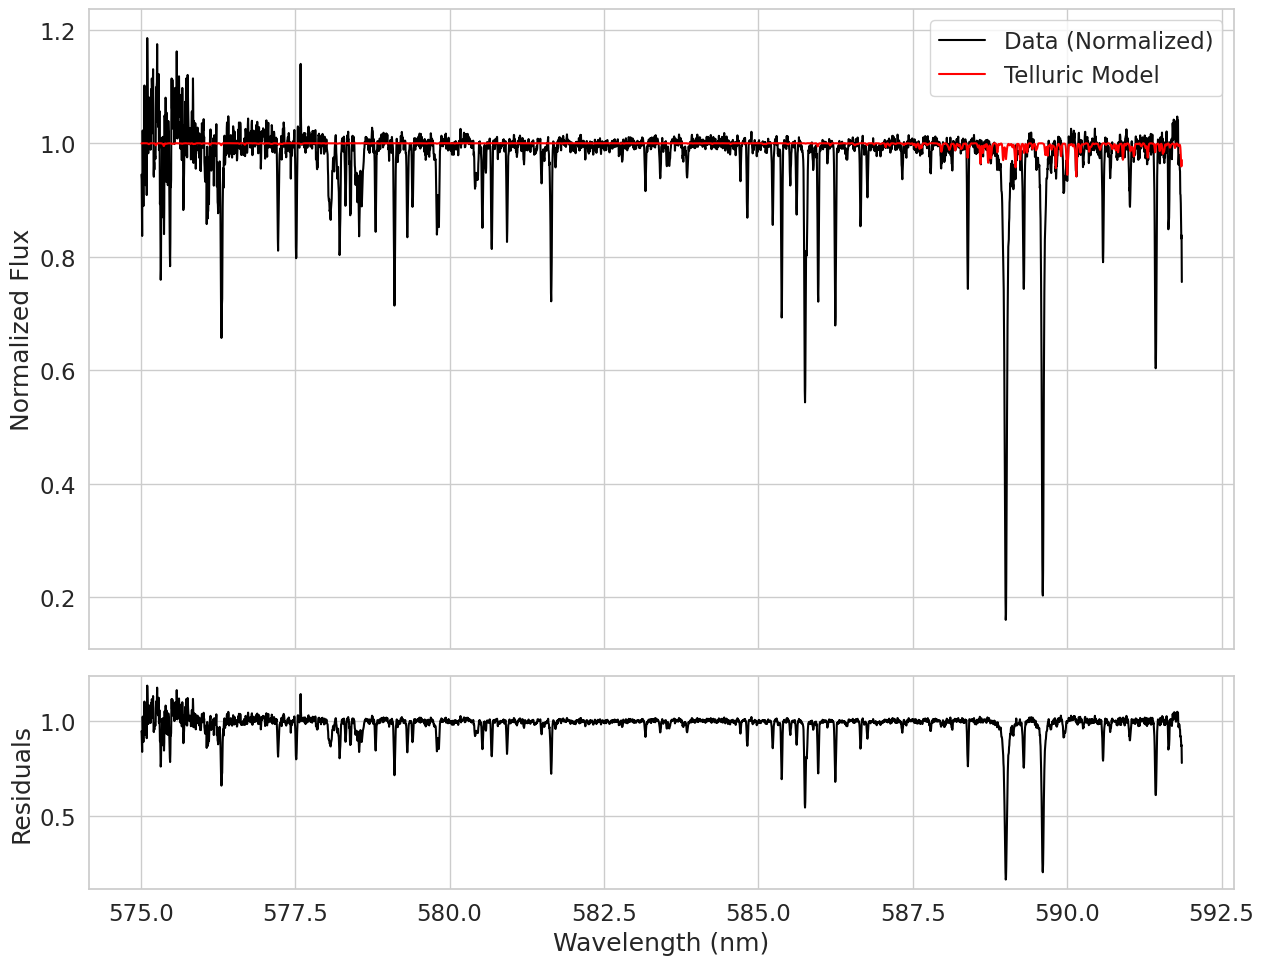

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
        Use Spectrum instead. [astropy.io.registry.core]
        Use Spectrum instead.


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.23system 0:02.00elapsed 100%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.75user 1.24system 0:01.99elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+624320outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.24system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.65586E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.25system 0:02.02elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.73user 1.30system 0:02.03elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624320outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.27system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 7680maxresident)k
0inputs+624320outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.40248E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.29system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+644064outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94937E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.83user 1.30system 0:02.14elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663480outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.21765E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.26system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7552maxresident)k
0inputs+663440outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94937E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.94937E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.81user 1.20system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.90575E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.18system 0:01.97elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+624336outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99017E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.30system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663400outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.99192E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.83user 1.25system 0:02.10elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663432outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96784E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.25system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.31447E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.76user 1.24system 0:02.01elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96784E+01	True		0 - 60
co2            	3.81578E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.27system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96784E+01	True		0 - 60
co2            	3.80000E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.24system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.98064E+01	True		0 - 60
co2            	3.77234E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.23system 0:02.04elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663448outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.31system 0:02.10elapsed 100%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.32669E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.74user 1.30system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.81015E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.78user 1.29system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.15767E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.29system 0:02.10elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663368outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97433E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.80user 1.28system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663384outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.97040E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.72user 1.36system 0:02.09elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663400outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96999E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.77user 1.27system 0:02.05elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663392outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.83user 1.28system 0:02.13elapsed 99%CPU (0avgtext+0avgdata 7808maxresident)k
0inputs+663432outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.24system 0:02.07elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663368outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.79user 1.29system 0:02.08elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+663384outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	5.96995E+01	True		0 - 60
co2            	3.79572E+02	True		300 - 450
o2             	2.12000E+05	True		100000 - 300000

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.82user 1.35system 0:02.18elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+663368outputs (0major+1103minor)pagefaults 0swaps


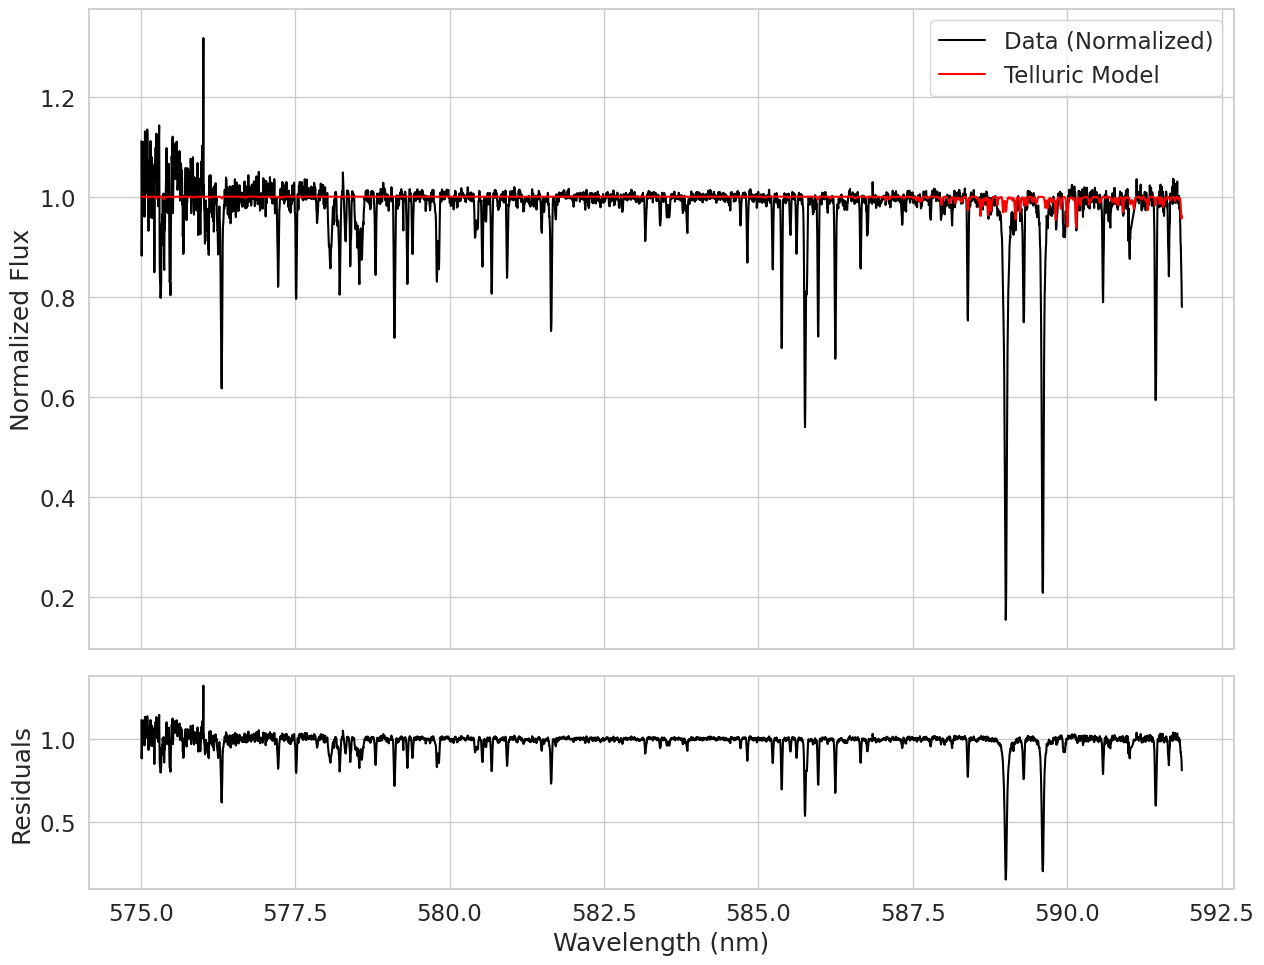

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from specutils import Spectrum1D
import telfit
import pandas as pd
import builtins
builtins.raw_input = input


for i in range(0,len(object_files)):

    part = object_files[i].split('_')[1]
    
    spec1d = Spectrum1D.read(object_files[i])
    
    flux = np.array(spec1d.flux)
    wave = np.array(spec1d.wavelength) / 10  # Convert Angstrom to nm

    # Create data structure for TelFit
    data = telfit.DataStructures.xypoint(x=wave, y=flux)

    # Instantiate the Telluric fitter
    fitter = telfit.TelluricFitter()

    # IAO/Hanle Observatory settings
    observatory = {
        "latitude": 32.78,    # IAO approx latitude
        "altitude": 4.5    # meters
    }
    fitter.SetObservatory(observatory)

    # Header/environment parameters
    angle = zeniths[i]         # Zenith distance
    pressure = 580             # hPa
    humidity = 35.0            # %
    temperature = 273          # Kelvin
    resolution = 30000.0       # lambda / delta-lambda

    # Define parameters to fit
    fitter.FitVariable({
        "h2o": humidity,
        "o2": 2.12e5,
        "co2": 380.0,
        "resolution": resolution  # let resolution vary
    })

    # Set constant values (not fit)
    fitter.AdjustValue({
        "angle": angle,
        "pressure": pressure,
        "temperature": temperature,
        "resolution": resolution,
        "wavestart": data.x[0] - 20.0,
        "waveend": data.x[-1] + 20.0
    })

    # Define bounds for fit variables
    fitter.SetBounds({
        "h2o": (0, 60),
        "o2": (1e5, 3e5),
        "co2": (300, 450),
        "resolution": (25000, 35000),
        "pressure": (570, 590),
        "temperature": (265, 285)
    })

    # Perform least-squares fit to telluric model
    model = fitter.Fit(
        data=data,
        resolution_fit_mode='gauss',  # Use 'gauss' or 'model'
        adjust_wave='model'           # Adjust model to match data wavelength
    )
    # Get fitted data
    newdata = fitter.data
    corrected_flux = newdata.y / model.y  # Telluric-corrected spectrum
    
    
    # Plot data and fit
    fig, (top, bottom) = plt.subplots(2, 1, sharex=True, figsize=(13, 10),
                                      gridspec_kw=dict(height_ratios=(3, 1)))

    top.plot(newdata.x, newdata.y / newdata.cont, 'k-', label='Data (Normalized)')
    top.plot(model.x, model.y, 'r-', label='Telluric Model')
    top.set_ylabel('Normalized Flux')
    top.legend(loc='best')


    bottom.plot(newdata.x, corrected_flux / newdata.cont, 'k-', label='Residuals')
    bottom.set_xlabel('Wavelength (nm)')
    bottom.set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

    